In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
raw_cvs_data = pd.read_csv('Karachi 100 Historical Data (1).csv')

In [ ]:
df_PSX100=raw_cvs_data.copy()
df_PSX100.Date = pd.to_datetime(df_PSX100.Date, dayfirst = True)
df_PSX100.set_index("Date", inplace=True)
df_PSX100=df_PSX100.asfreq('b')
data=df_PSX100.fillna(method='ffill')
data['Price']=data['Price'].str.replace(',',"").astype(float)

C:\Users\HK\AppData\Local\Temp\ipykernel_14024\116715147.py:2: UserWarning: Parsing '12/30/2022' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_PSX100.Date = pd.to_datetime(df_PSX100.Date, dayfirst = True)
C:\Users\HK\AppData\Local\Temp\ipykernel_14024\116715147.py:2: UserWarning: Parsing '12/29/2022' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_PSX100.Date = pd.to_datetime(df_PSX100.Date, dayfirst = True)
C:\Users\HK\AppData\Local\Temp\ipykernel_14024\116715147.py:2: UserWarning: Parsing '12/28/2022' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_PSX100.Date = pd.to_datetime(df_PSX100.Date, dayfirst = True)
C:\Users\HK\AppData\Local\Temp\ipykernel_14024\116715147.py:2: UserWarning: Parsing '12/27/2022' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_PSX100.Dat

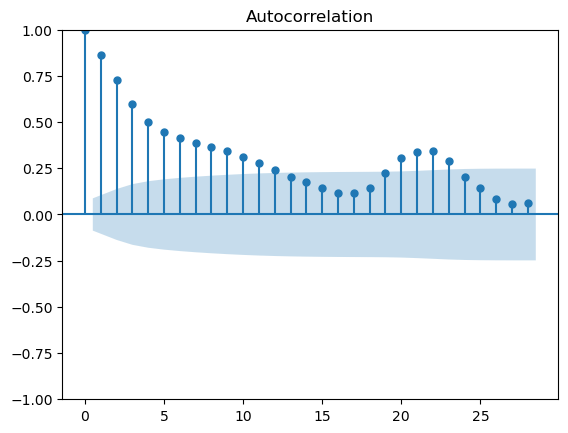

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


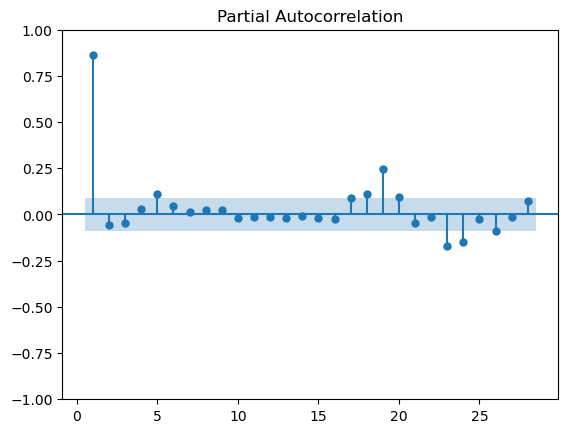

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data,zero=False)
plt.show()

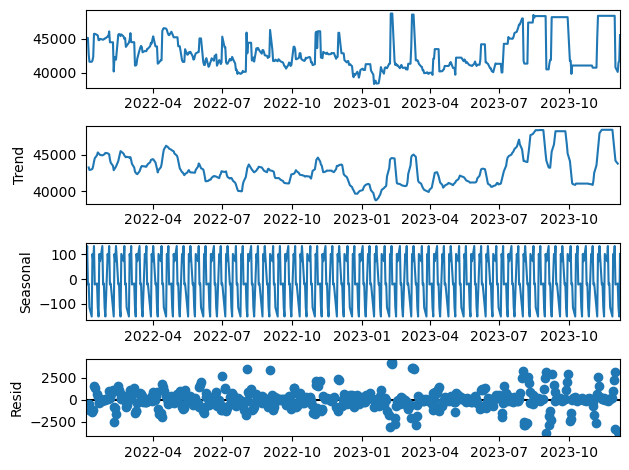

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
series = data
result = seasonal_decompose(series, model='additive',period=7)
result.plot()
pyplot.show()

In [ ]:
X=data.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=43051.207659, mean2=43045.119286
variance1=2819240.217293, variance2=10471347.124843


In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
if result[0]>0.05:
  print('Series is not Stationary')
else:
  print("Series is stationary")

ADF Statistic: -2.106992
p-value: 0.241712
Critical Values:
	1%: -3.444
	5%: -2.868
	10%: -2.570
Series is stationary
